# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [228]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# import scipy
# import sklearn

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [229]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [230]:
# CÉLULA PARA ANÁLISE DOS ATRIBUTOS 
# checando valores possíveis para as colunas para análise dos atributos

display(df_dataset["MOTIVO2"].str.lower().unique())

# null_mask = df_dataset["IDADE"].isnull()
# display(df_dataset[pd.to_datetime(df_dataset['Atendimento'], errors='coerce').isna()])



array(['6 - palpitação/taquicardia/arritmia', '6 - dispnéia', nan,
       '5 - atividade física', '5 - cirurgia', '6 - sopro',
       '1 - cardiopatia adquirida', '1 - cardiopatia congenica',
       '6 - dor precordial', '6 - has/dislipidemia/obesidade',
       '6 - cianose', 'outro', '6 - alterações de pulso/perfusão',
       '6 - cardiopatia na familia', '6 - cansaço',
       '5 - uso de cisaprida', '6 - cianose e dispnéia'], dtype=object)

##### Análise dos atributos

* **Id**: Identificação do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes
    * tratamento por média
    * REMOVIDA:

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)
    * tratamento por média
    * REMOVIDA:

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0
    * tratamento por média

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos
    * tratamento por média

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento
    * REMOVIDA:

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes
    * tratamento por média

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 
    * tratamento por média

* **Pressão de Pulso Arterial** (PPA): [não calculado, normal, pre-hipertensão pas, has-2 pas, pre-hipertensão pad, has-1 pas, has-2 pad, has-1 pad]
    * valor inválido ('#VALUE!')
    * tratamento por moda

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * tratamento por moda

* **Sopro**: Sopro cardíaco [sistólico, ausente, contínuo, diastólico, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * tratamento por moda

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
    * tratamento por média

* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas


#### Exploração dos dados com estatística descritiva

Resumo quantitativo das principais características de um conjunto de dados:
* Frequência
* Localização ou tendência central
* Dispersão ou espalhamento
* Distribuição ou formato

Os três últimos são utilizados geralmente para valores numéricos.

Para dados univariados: 
* Medidas de localidade: moda, média, mediana, média truncada, quartis, percentil (boxplot)
* Medidas de espalhamento: intervalo, variância e descio padrão
* Medidas de distribuição: obliquidade ou assimetria e curtose (histograma e gráfico pizza)

Para dados multivariados:
* Medidas de localidade: calculado para cada atributo separadamente
* Medidas de espalhamento: calculado apra cada atributo separadamente + covariância e correlação (matriz de covariância ou correlação)

In [231]:
print("Registros de treino fornecidos: ", df_train_id.shape)

# recuperar as partições de treino por Id e concatenar o coluna alvo CLASSE
df_train = pd.merge(df_dataset, df_train_id, on='Id')

# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0)

print("Registros de treino classificados: ", df_train.shape)


Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)


In [232]:
# ANÁLISE DE VALORES FALTANTES
def analise_valores_faltantes(df):
    missing_data = df.isnull().mean() * 100  # porcentagem de valores faltantes
    print(f"Relação de atributos e porcentagem de nulos: ")
    print(missing_data)

def analise_registro_incompleto(df, p):
    # identificar as linhas com menos de p% de valores preenchidos
    faltantes = df.isnull().sum(axis=1) > (df.shape[1]*p)
    soma = faltantes.sum()
    
    print(f"{soma} de {df.shape[0]} ({soma/df.shape[0]*100}%) registros com mais de {p*100}% dos atributos não preenchidos: ")
    display(df[faltantes])
    
    return faltantes

analise_valores_faltantes(df_dataset)

Relação de atributos e porcentagem de nulos: 
Id                0.000000
Peso              1.779220
Altura            0.000000
IMC              26.447714
Atendimento       5.499916
DN                7.698763
IDADE             7.698763
Convenio         29.676048
PULSOS            6.702848
PA SISTOLICA     43.249594
PA DIASTOLICA    43.305545
PPA               1.214122
B2                6.596542
SOPRO             6.529402
FC               11.419460
HDA 1            30.291501
HDA2             96.352039
SEXO              0.022380
MOTIVO1           6.137750
MOTIVO2          26.733061
dtype: float64


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [233]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

df_train = df_train.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)

In [234]:
# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS

# col_numerica = ['Id', 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_numerica = ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_categorica = ['PULSOS', 'PPA', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2']

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = df_train[col_numerica].apply(pd.to_numeric, errors='coerce')
    # identificando valores fora do intervalo aceitável

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = df_train[col_categorica].apply(lambda col: col.str.lower() if col.dtype == 'object' else col)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_train['PPA'] = df_train['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)

In [235]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

faltantes = analise_registro_incompleto(df_train, 0.5)
df_train = df_train[~faltantes]
# display(df_train[col_numerica])

167 de 13559 (1.2316542517884799%) registros com mais de 50.0% dos atributos não preenchidos: 


,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
293,363,NaN,1.32,normais,NaN,NaN,NaN,normal,ausente,100.0,NaN,NaN,NaN,NaN,Normal
442,552,NaN,NaN,normais,NaN,NaN,NaN,normal,ausente,96.0,NaN,NaN,NaN,NaN,Normal
633,772,NaN,NaN,NaN,NaN,NaN,NaN,hiperfonética,sistólico,NaN,NaN,f,NaN,NaN,Anormal
667,810,NaN,NaN,normais,NaN,NaN,NaN,normal,ausente,96.0,NaN,NaN,NaN,NaN,Normal
822,998,NaN,NaN,normais,NaN,NaN,NaN,normal,ausente,96.0,NaN,NaN,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,17783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
14669,17804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
14692,17834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
14698,17840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [236]:
# PREENCHER FALTANTES 

from sklearn.impute import SimpleImputer
# from sklearn.impute import IterativeImputer 

# NUMÉRICOS COM MÉDIA
imputer_media = SimpleImputer(strategy='mean')
df_train[col_numerica] = imputer_media.fit_transform(df_train[col_numerica])
# print("Atributos numéricos com faltantes tratados: ")
# display(df_train[col_numerica])
# analise_valores_faltantes(df_train)

# CATEGÓRICOS COM MODA
imputer_moda = SimpleImputer(strategy='most_frequent')
df_train[col_categorica] = imputer_moda.fit_transform(df_train[col_categorica])
# print("Atributos categóricos com faltantes tratados: ")
# display(df_train[col_categorica])
# analise_valores_faltantes(df_train)

In [237]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)
df_train = df_train.drop_duplicates(subset=['IMC','IDADE','PULSOS','PA SISTOLICA','PA DIASTOLICA','PPA','B2','SOPRO','FC','HDA 1','SEXO','MOTIVO1','MOTIVO2', 'CLASSE'], keep='first')
print("Registros de treino sem duplicatas: ", df_train.shape)

Registros de treino sem duplicatas:  (13227, 15)


In [238]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)
df_train = df_train.drop_duplicates(subset=['IMC','IDADE','PULSOS','PA SISTOLICA','PA DIASTOLICA','PPA','B2','SOPRO','FC','HDA 1','SEXO','MOTIVO1','MOTIVO2',], keep=False)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (13211, 15)


In [239]:
# GERAR ESTATÍSTICA DO CONJUNTO 

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13211.000000,13211.000000,13211.000000,13211,13211.000000,13211.000000,13211,13211,13211,13211.000000,13211,13211,13211,13211,13211
unique,NaN,NaN,NaN,5,NaN,NaN,7,5,5,NaN,8,2,5,16,3
top,NaN,NaN,NaN,normais,NaN,NaN,normal,normal,ausente,NaN,assintomático,m,5 - parecer cardiológico,5 - cirurgia,Normal
freq,NaN,NaN,NaN,13078,NaN,NaN,12468,12628,8484,NaN,10633,7876,6377,6360,7906
mean,8916.741049,17.812144,5.992918,NaN,101.402219,62.381460,NaN,NaN,NaN,93.946102,NaN,NaN,NaN,NaN,NaN
std,5159.803061,10.070281,8.144519,NaN,11.785842,7.037453,NaN,NaN,NaN,109.326007,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,-113.180000,NaN,10.000000,6.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
25%,4427.000000,16.000000,2.370000,NaN,100.000000,60.000000,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN
50%,8889.000000,17.791731,5.959505,NaN,101.392675,62.371345,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN
75%,13372.000000,19.000000,9.825000,NaN,101.392675,62.371345,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


In [240]:
# NORMALIZAR ATRIBUTOS

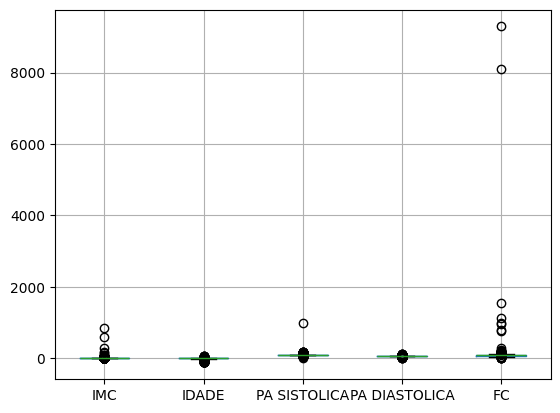

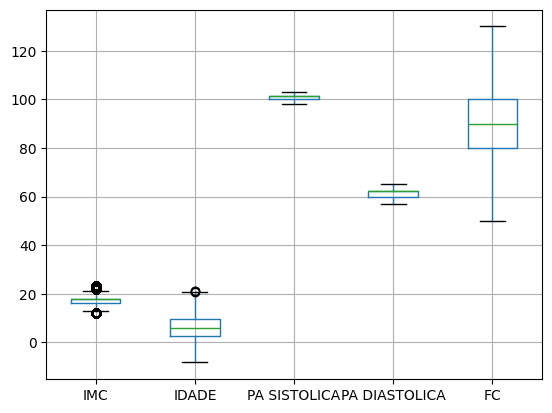

Relação de atributos e porcentagem de nulos: 
Id                0.000000
IMC               7.175838
IDADE             0.840209
PULSOS            0.000000
PA SISTOLICA     36.197108
PA DIASTOLICA    27.242449
PPA               0.000000
B2                0.000000
SOPRO             0.000000
FC                2.997502
HDA 1             0.000000
SEXO              0.000000
MOTIVO1           0.000000
MOTIVO2           0.000000
CLASSE            0.000000
dtype: float64


In [ ]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS
# identificação de outliers por atributo 

# por boxplot
df_train.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()

def identificar_outlier(coluna):
    # considera medida de dispersão
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    print(f"Limite inf: {limite_inferior}\nLimite sup: {limite_superior}")
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

def identificar_outlier_percentil(coluna, p_inf, p_sup):
    # exluir os menores que p_inf e os maiores que p_sup
    # não considera dispersão, ilda apenas com as extremidades
    limite_inferior = np.percentile(coluna, p_inf*100)
    limite_superior = np.percentile(coluna, p_sup*100)
    print(f"Limite inf: {limite_inferior}\nLimite sup: {limite_superior}")
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

def remover_outliers_quartil(df, colunas):
    # marca outliers como NaN
    df_copy = df.copy()
    for coluna in colunas:
        Q1 = df_copy[coluna].quantile(0.25)
        Q3 = df_copy[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_copy.loc[~df[coluna].between(limite_inferior, limite_superior), coluna] = np.nan
    return df_copy

def remover_outliers_percentil(df, colunas, p_inf, p_sup):
    # marca outliers como NaN
    df_copy = df.copy()
    for coluna in colunas:
        limite_inferior = np.percentile(df_copy[coluna], p_inf*100)
        limite_superior = np.percentile(df_copy[coluna], p_sup*100)
        df_copy.loc[~df_copy[coluna].between(limite_inferior, limite_superior), coluna] = np.nan
    return df_copy

df_resul = remover_outliers_quartil(df_train, ['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])

df_resul.boxplot(column=['IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC'])
plt.show()

analise_valores_faltantes(df_resul)

In [ ]:
# IDENTIFICAR OUTLIERS CONSIDERANDO TODOS OS ATRIBUTOS
# identificação de outliers por registro 
# uma estratégia é a aplicação do PCA para redução de dimensionalidade 

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.